In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

In [2]:
data = pd.read_csv("mnist_train.csv")

In [3]:
data = data[data['label'].isin([0, 1])]

In [4]:
X = data.drop('label', axis=1).values
y = data['label'].values

In [5]:
X = X / 255.0

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [9]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)


In [10]:
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"ROC AUC   : {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(cm)


Accuracy  : 0.9984
Precision : 0.9993
Recall    : 0.9978
F1 Score  : 0.9985
ROC AUC   : 1.0000

Confusion Matrix:
[[1184    1]
 [   3 1345]]


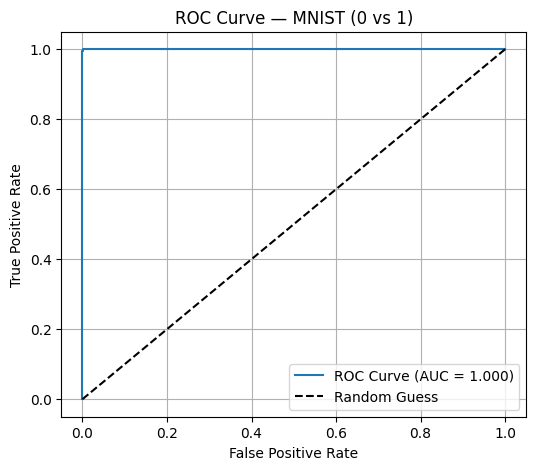

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — MNIST (0 vs 1)")
plt.legend()
plt.grid(True)
plt.show()